# Ensemble Learning - Easy Visa

### Problem Statement

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor
certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process
of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help shortlist candidates with
higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have

To analyze the data provided and, with the help of a classification model:
1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that
    significantly influence the case status.

### Data Dictionary

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

- case_id: ID of each visa application
- continent: Information of continent the employee
- education_of_employee: Information of education of the employee
- has_job_experience: Does the employee have any job experience? Y= Yes; N = No
- requires_job_training: Does the employee require any job training? Y = Yes; N = No
- no_of_employees: Number of employees in the employer's company
- yr_of_estab: Year in which the employer's company was established
- region_of_employment: Information of foreign worker's intended region of employment in the US.
- prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of  the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
- case_status: Flag indicating if the Visa was certified or denied

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("datasets/EasyVisa.csv")

In [3]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Observations

- Columns - 'case-id', 'continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status' are of datatype **object**
- Columns - 'no_of_employees','yr_of_estab' are of datatype **int64**
- Columns - 'prevailing_wage' are of datatype **float64**

In [5]:
data.describe(include = 'all')

case_id continent education_of_employee has_job_experience  \
count    25480     25480                 25480              25480   
unique   25480         6                     4                  2   
top     EZYV01      Asia            Bachelor's                  Y   
freq         1     16861                 10234              14802   
mean       NaN       NaN                   NaN                NaN   
std        NaN       NaN                   NaN                NaN   
min        NaN       NaN                   NaN                NaN   
25%        NaN       NaN                   NaN                NaN   
50%        NaN       NaN                   NaN                NaN   
75%        NaN       NaN                   NaN                NaN   
max        NaN       NaN                   NaN                NaN   

       requires_job_training  no_of_employees   yr_of_estab  \
count                  25480     25480.000000  25480.000000   
unique                     2              NaN           NaN   
top                        N              NaN           NaN   
freq                   22525              NaN           NaN   
mean                     NaN      5667.043210   1979.409929   
std                      NaN     22877.928848     42.366929   
min                      NaN       -26.000000   1800.000000   
25%                      NaN      1022.000000   1976.000000   
50%                      NaN      2109.000000   1997.000000   
75%                      NaN      3504.000000   2005.000000   
max                      NaN    602069.000000   2016.000000   

       region_of_employment  prevailing_wage unit_of_wage full_time_position  \
count                 25480     25480.000000        25480              25480   
unique                    5              NaN            4                  2   
top               Northeast              NaN         Year                  Y   
freq                   7195              NaN        22962              22773   
mean                    NaN     74455.814592          NaN                NaN   
std                     NaN     52815.942327          NaN                NaN   
min                     NaN         2.136700          NaN                NaN   
25%                     NaN     34015.480000          NaN                NaN   
50%                     NaN     70308.210000          NaN                NaN   
75%                     NaN    107735.512500          NaN                NaN   
max                     NaN    319210.270000          NaN                NaN   

       case_status  
count        25480  
unique           2  
top      Certified  
freq         17018  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

### Observations

- The highest continent in terms of visa requirement is "Asia" with 16861 applications
- There are 10234 applications wherein the applicants have BTech education
- About 14802 have job experience 
- About 22525 do not require job training 
- There are certain outliers with -26 as minimum nnumber of employees which needs to be removed, also the maximum number of employees are 602069 suggesting normalization may be required
- Year of establishment can be as old as 1800 and as new as 2016
- Region of employement have 5 unique values with Northeast having the most of 7195
- The prevailing wage has min of 2.13 and maximum of 319210.27 which needs to normalized based on the unit of wage.
- The unit_of_wage has a maximum value of Year with 22962 count
- There 22773 applicants with full time position
- There are 17018 applicants having case status as 'Certified' 

In [6]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Observations

- There are no null values in the dataset

In [7]:
data.duplicated().sum()

0

### Observations 

- There are no duplicates present in the dataset

### EDA Univariate Analysis

In [8]:
#analyzing continent column using countplot
px.histogram(data,x='continent')

### Observations 

- 16.861k applicants have applied from Asia
- 551 applicants have applied from Africa
- 3292 applicants have applied from North America
- 3732 applicants have applied from Europe
- 852 applicants have applied from South America
- 192 applicants have applied from Oceania

In [9]:
#analyzing the education_of_employee using histogram
px.histogram(data,x='education_of_employee')

### Observations 

- 3420 applicants have completed only high school 
- 9634 applicants have completed Master's degree
- 10.234K applicants have completed Bachelor's degree
- 2192 applicants have completed Doctorate degree

In [10]:
#analyzing the has_job_experience using histogram
px.histogram(data,x='has_job_experience')

### Observations

- There are 10.678K applicants who do not have job experience.
- There are 14.802K applicants who have job experience

This column seems pretty balanced in terms of the distribution

In [11]:
#analyzing the 'requires_job_training' using histogram
px.histogram(data,x='requires_job_training')

### Observations

- There are 22.52K applicants who do not require job training 
- There are 2955 applicants who require job training

In [12]:
# analyzing the 'region_of_employment'
px.histogram(data,x='region_of_employment')

### Observations

- Highest applicants are the region of NorthEast with count of 7195
- Applicants from South region have a count of 7017
- Applicants from West region have a count of 6586
- Applicants from a Midwest region have a count of 4307
- Applicants from Island have a count of 375

In [13]:
#analyzing 'unit_of_wage' column using histogram
px.histogram(data,x='unit_of_wage')

### Observations

- Most of unit of wage are in year with 22.962K applicants
- Some have hourly unit of wage as well 
- Small amounts have unit of wage in week and monthly format as well

In [14]:
#analyzing the 'full_time_position' using histogram
px.histogram(data,x='full_time_position')

### Observations

- There are 22.773K people who have full_time_position 
- There are 2707 people who do have part time position

Also there are only 14K applicants who have job experience but 22K applicants who have full_time_position, who seems to some wrong data

In [15]:
#analyzing the 'case_status' using histogram
px.histogram(data,x='case_status')

### Observations

- There are 17.108K applicants which are certified 
- There are 8462 applicants which are not certified 

There seems to be a little imbalance in the data which needs balancing

In [16]:
#analyzing the no_of_employees using boxplot
px.box(data,x='no_of_employees')

### Observations

1. There are certain instances of negative numbers which are definitely outliers and needs to be removed 
2. The median is around 2k employees 
3. The highest is 602k employees which could be true but needs further verification

In [17]:
# removing outliers having negative number of employees
data = data[data['no_of_employees']> 0]

In [18]:
#analyzing yr_of_estab using scatter plot
px.scatter(data,x='yr_of_estab')

### Observations

1. Most companies are established after 1950s 
2. Very less compnies were there during the 1800s

In [19]:
#analyzing prevailing_wage using box plot
px.box (data,x='prevailing_wage')

### Observations

1. The median is around 70k
2. Wage is in terms of varied units, therefore needs to be normalized with respect to the unit_of_wage
3. Post the above normalization, we need to check if it still requires scaling to be done

In [20]:
#normalization of prevailing wages to per hour considering an average of 8 hours per day basis

#there are 12 months, each month has 4 weeks and each week has 5 working days and each day has on average 8 working hours
hours_per_year = 12*4 * 5 * 8
data.loc[data['unit_of_wage'] == 'Year','prevailing_wage'] = data['prevailing_wage']/hours_per_year 

#each month has 4 weeks and each week has 5 working days and each day has on average 8 working hours
hours_per_month = 4*5*8
data.loc[data['unit_of_wage'] == 'Month','prevailing_wage'] = data['prevailing_wage']/hours_per_month 

# each week has 5 working days and each day has on average 8 working hours
hours_per_week = 5*8
data.loc[data['unit_of_wage'] == 'Week','prevailing_wage'] = data['prevailing_wage']/hours_per_week 


In [21]:
#analyzing the 'prevailing_wage' column using boxplot
px.box(data,x='prevailing_wage')

### Observations

1. The data has been normalized to certain extent with median 0.0258
2. The maximum value is as big as 999.92 per hour billing for a person.
3. This data definitely contains outliers which needs to be dealt with as per further operations

## EDA - Bivariate and Multivariate analysis

<Axes: xlabel='yr_of_estab', ylabel='no_of_employees'>

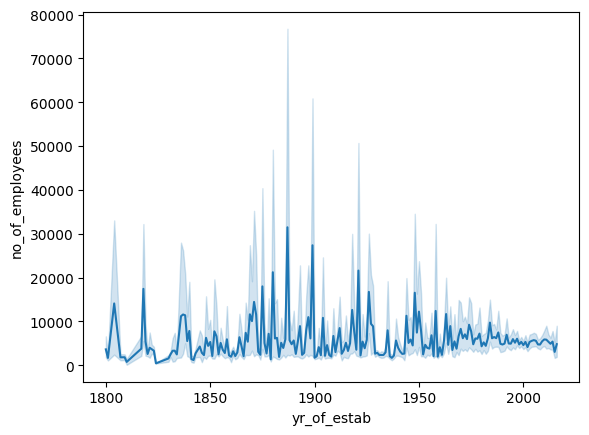

In [22]:
#analyzing the yr_of_estab vs no_of_employees through lineplot
sns.lineplot (data,x='yr_of_estab',y='no_of_employees')

### Observations

1. Companies whose establishment is between 1870 and 1920 have the most employees 
2. Companies before 1870 have comparatively lesser number of employees in certain cases
3. New age companies have the least number of employees

<Axes: xlabel='continent', ylabel='count'>

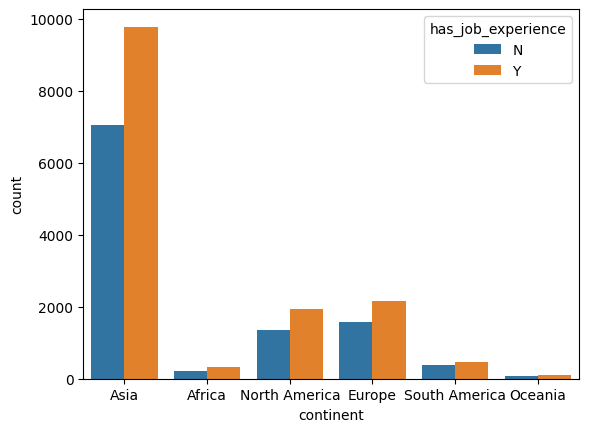

In [23]:
#analyzing the job experience wrt to the continent using countplot
sns.countplot(data,x='continent',hue='has_job_experience')

### Observations

1. While there are more applicants having job experience, Asia has most applicants with job experience.
2. Africa, North America, Europe, South America have less applicants compared to people having no job experience being part of the application process

<Axes: xlabel='full_time_position', ylabel='count'>

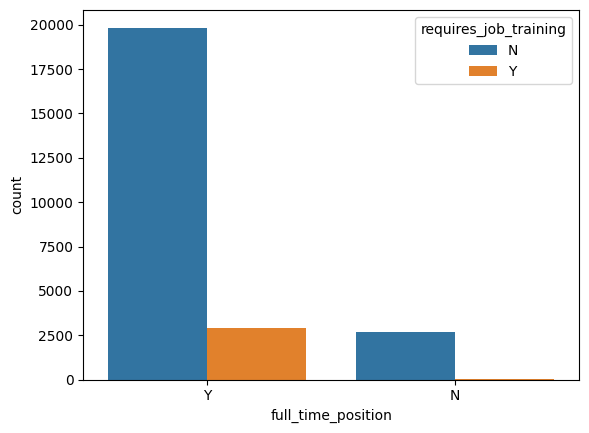

In [24]:
#analyzing whether full_time_position people require job training
sns.countplot(data,x='full_time_position', hue = 'requires_job_training')

### Observations

1. There are no applicants who are on part time position and require job training which seems like an application for further studies.
2. There are good number of applicants who are on full_time_position yet do not require job training. 
3. However, there are certain applicant who are on full_time_position and do require job training

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20324\2682926267.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='region_of_employment', ylabel='yr_of_estab'>

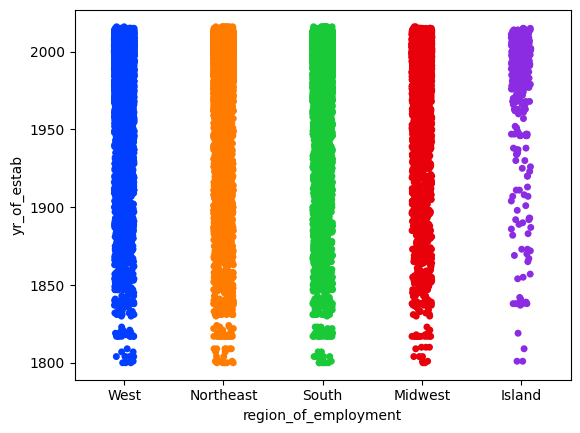

In [25]:
#analyzing the yr_of_estab to the region_of_employment using violinplot
sns.stripplot (data,x='region_of_employment',y='yr_of_estab', palette='bright')

### Observations

1. Interesting West,Northeast, South and Midwest regions have developed pretty consistenly as compared to Island
2. However, Island region is upcoming in terms of companies establishment

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20324\3939730953.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='case_status', ylabel='prevailing_wage'>

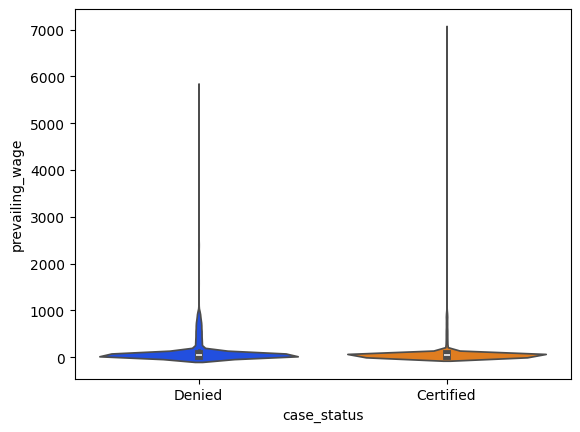

In [26]:
# analyzing the prevailing_wage and case_status using violinplot
sns.violinplot(data,x='case_status',y='prevailing_wage',orient='v',palette='bright')

### Observations

1. The prevailing_wage per hour in case of Denied has median near to zero but certain cases have it very high as well, most likely denied due to some illegal activity or police case
2. The prevailing_wage per hour in case of Certified also has median close to zero but has certain cases of extremely high close to 1000 which is most likely an outlier. 

<Axes: xlabel='full_time_position', ylabel='count'>

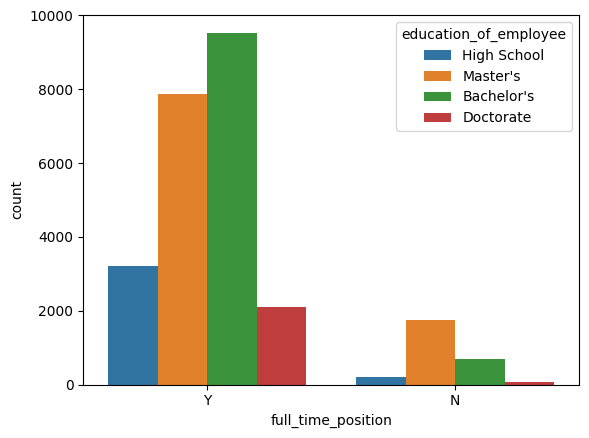

In [27]:
#analyzing the full_time_position granted in terms of the eduction that the applicant has
sns.countplot(data,x='full_time_position',hue='education_of_employee')

### Observations

1. Applicants who are on full time position are mostly Bachelors and Masters. However there is good number of High School applicants as well 
2. Applicants who are on part time position are mostly Masters. There  are very less applicants who are Doctorates and are on part time position as applicants

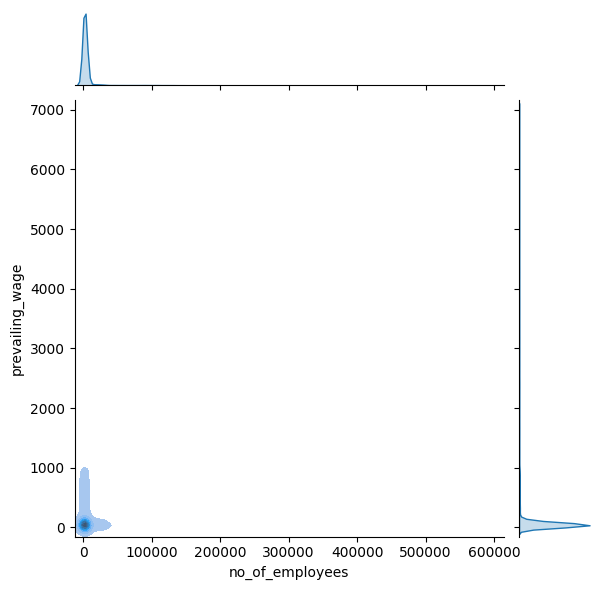

In [28]:
# analyzing number of employees against the prevailing wage using jointplot
sns.jointplot(data,x='no_of_employees',y='prevailing_wage',kind='kde',fill=True)

### Observations

1. There are lots of applicants from industries whose prevailing wage per hour is pretty less even as the no_of_employees is less. 
2. There are very less applicants with high prevailing wage as number of employees increases in particular industry

<Axes: xlabel='full_time_position', ylabel='count'>

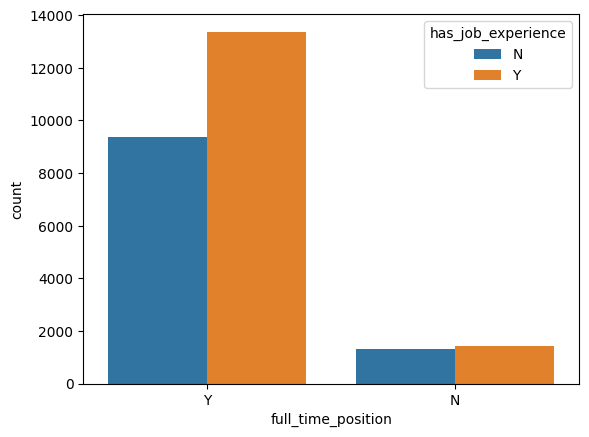

In [29]:
#analyzing the job_experience to a full_time_position using countplot
sns.countplot(data,x='full_time_position',hue='has_job_experience')

### Observations

1. There are higher applicants for folks having job experience and a full time position as compared to ones who do not have job experience yet a full time position
2. There are nearly the same number of applicants with a part time position having and not having job experience

<Axes: >

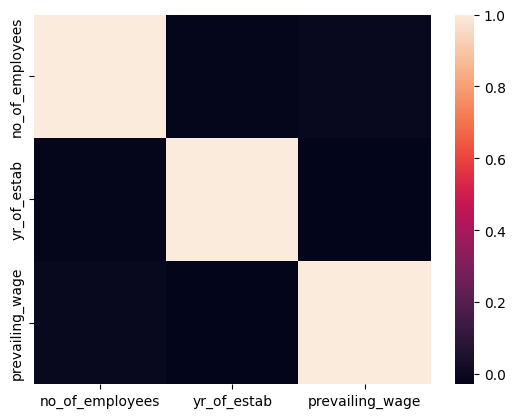

In [30]:
#analyzing heatmap to see the correlation between variables
sns.heatmap(data = data[['no_of_employees','yr_of_estab','prevailing_wage']].corr())

### Observations

1. There happens to be no co-relation between the prevailing wage per hour, yr_of_estab and no_of_employees

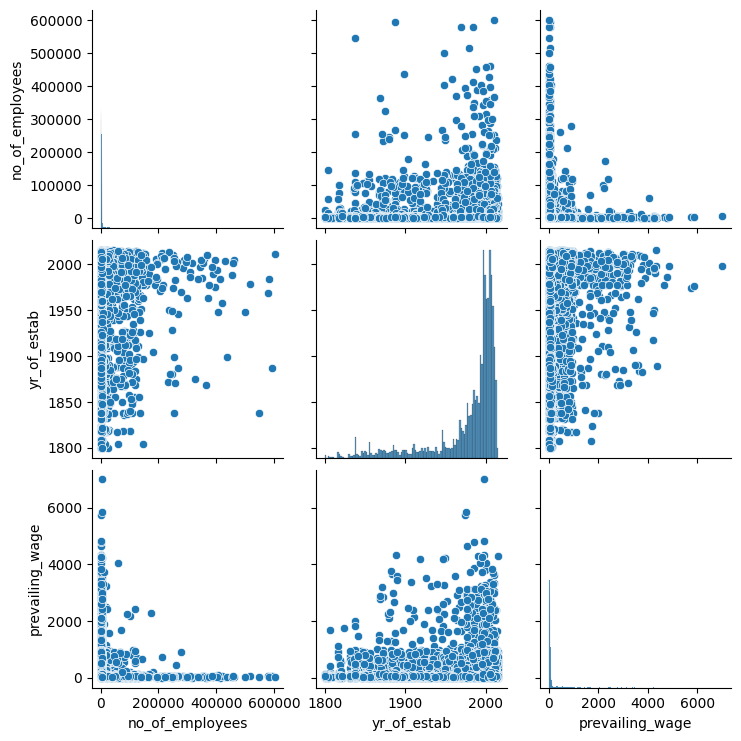

In [31]:
# pairplot to analyzing the relationship
sns.pairplot(data = data[['no_of_employees','yr_of_estab','prevailing_wage']])

### Observations

1. The number of employees in the industry has definitely grown over the years while the prevailing wage has also but not so much
2. As the number of employees increase the prevailing wage per hour still remains low.

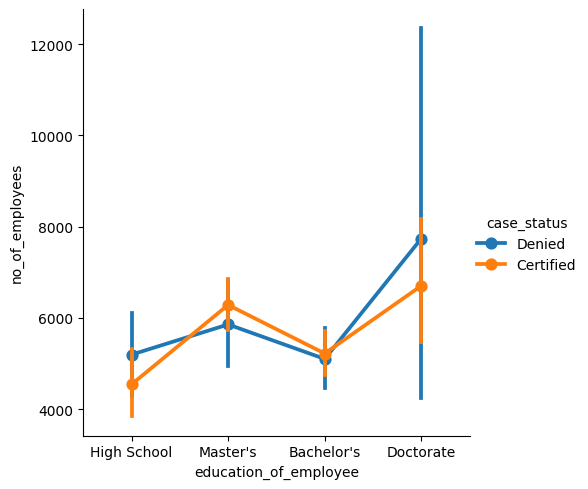

In [32]:
#analyzing the education of employee against the number of employees and the case status
sns.catplot(data,x='education_of_employee',y='no_of_employees',hue='case_status',kind='point')

### Observations

1. For High School applicants, work in companies haveing 4000-6000 employees have faced more denials for visa
2. For Master's applicants, work in companies having around 6000 employees haved faced for approvals for visa
3. For Bachelors applicants, work in varied companies have faced nearly equal denials and approvals of visa
4. For Doctorate applicants, work in companies having close to 8000 employees have mostly faced denials of visa

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'North America'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'South America'),
  Text(5, 0, 'Oceania')])

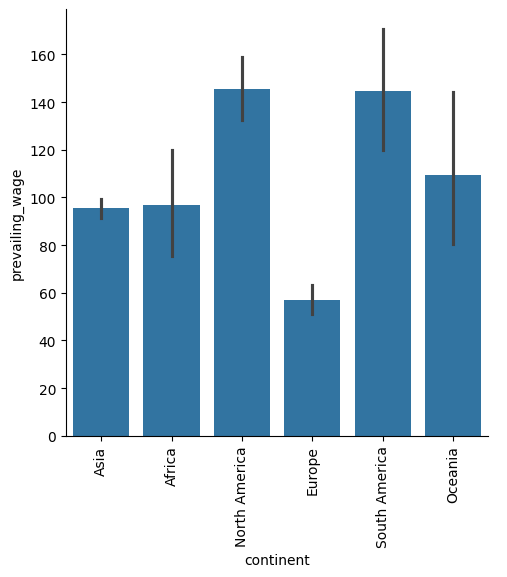

In [33]:
#analyzing the continent against the prevailing_wage and the case status
sns.catplot(data,x='continent',y='prevailing_wage',kind='bar')
plt.xticks(rotation=90)

### Observations

1. South America has the highest prevailing_wage followed by North America
2. Europe has least prevailing_wage

## Data Pre-processing

In [34]:
#normalization of 'number_of_employees' and 'prevailing_wage'
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

data[['prevailing_wage','no_of_employees']] = pd.DataFrame(standard_scaler.fit_transform(data[['prevailing_wage','no_of_employees']]))

In [35]:
# dropping the column 'unit_of_wage' since everything is normalized to per hour wages and 'case_id' since it is not adding any value
data = data.drop(columns  = ['unit_of_wage','case_id'],axis=1)

## Data Preparation for Model building

In [36]:
#encoding of the categorical data in case_status column using Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['case_status'] = le.fit_transform(data['case_status'])

In [122]:
#removal of null values of the dataset
data=data.dropna()

In [123]:
#splitting of the data into training and testing data
from sklearn.model_selection import train_test_split


X= data.drop(['case_status'],axis=1)
y = data['case_status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)
X_train.head()

continent education_of_employee has_job_experience  \
14206           Asia            Bachelor's                  Y   
10162  North America            Bachelor's                  Y   
11324           Asia            Bachelor's                  Y   
5764   North America              Master's                  Y   
22978           Asia            Bachelor's                  N   

      requires_job_training  no_of_employees  yr_of_estab  \
14206                     N        -0.197298         2013   
10162                     N        -0.034616         1998   
11324                     N        -0.240851         1979   
5764                      N        -0.201797         1996   
22978                     N        -0.121243         2006   

      region_of_employment  prevailing_wage full_time_position  
14206            Northeast        -0.118423                  N  
10162            Northeast        -0.310013                  Y  
11324                South         0.064640                  Y  
5764                 South        -0.298616                  N  
22978            Northeast        -0.239711                  Y

In [124]:
#conversion of categorical data to numerical data
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)


## Model Building - Bagging

In [126]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

DT0 = DecisionTreeClassifier(random_state=1)
DT0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [127]:
#evaluation metrics on train data
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

pred = (DT0.predict(X_train))

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 1.0
Recall: 1.0
Precision 1.0
F1-Score: 1.0


<Axes: >

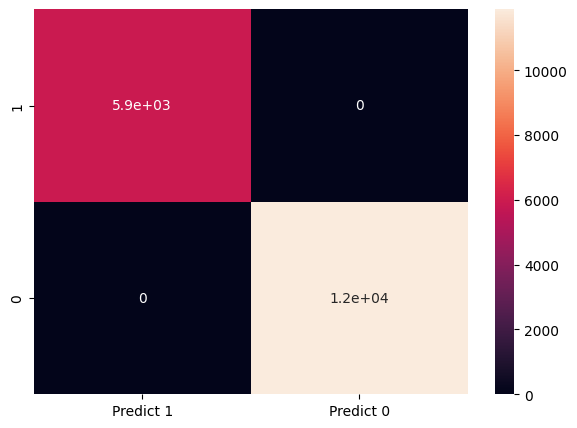

In [128]:
#building the confusion matrix for decision tree training data
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [129]:
y_pred = DT0.predict(X_test)

In [130]:
#evaluation metrics on test data

accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.6462950819672131
Recall: 0.4972353870458136
Precision 0.46925083861349237
F1-Score: 0.4828379674017258


<Axes: >

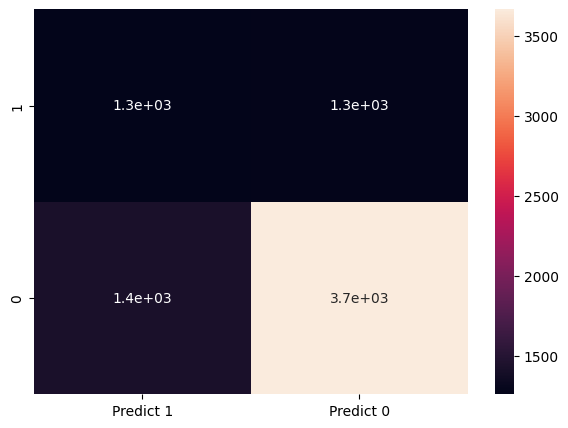

In [131]:
#building the confusion matrix for decision tree testing data
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

1. There is a very low test accuracy and precision compared to the training accuracy and precision suggesting that the model is severly overfitting 

In [132]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF0 = RandomForestClassifier(random_state=1)
RF0.fit (X_train,y_train)

RandomForestClassifier(random_state=1)

In [133]:
#evaluation metrics on train data
pred = (RF0.predict(X_train))

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.9998875709708247
Recall: 0.9996613613274636
Precision 1.0
F1-Score: 0.9998306519898391


<Axes: >

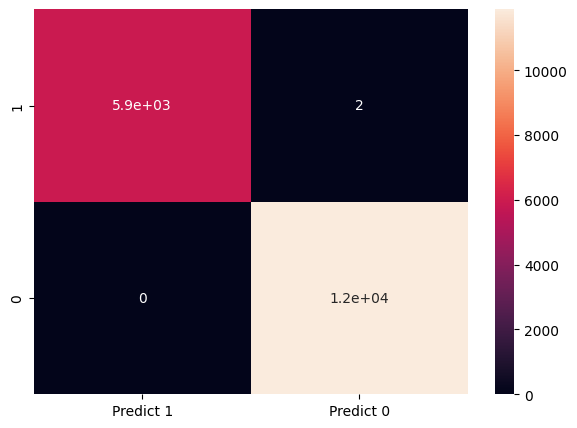

In [134]:
#building the confusion matrix for random forest training data
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [135]:
y_pred = (RF0.predict(X_test))

In [136]:
#evaluation metrics on test data
accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.7161967213114754
Recall: 0.45932069510268564
Precision 0.593973442288049
F1-Score: 0.5180400890868597


<Axes: >

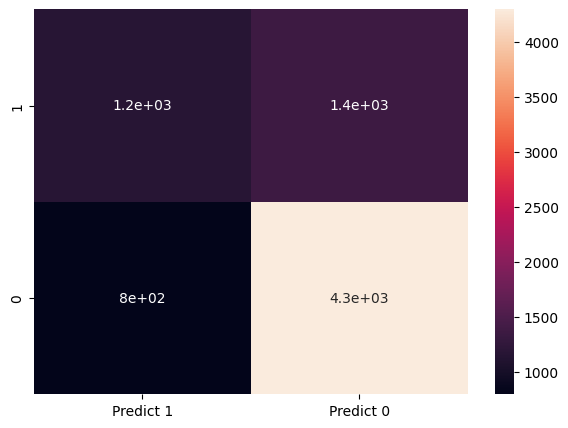

In [137]:
#building the confusion matrix for random forest training data
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

1. There is pretty high difference on the precision  and accuracy of the training data and testing data, showing the model is overfit on training data

## Model Improvement - Bagging

### Decision Tree - Hyperparameter tuning

In [173]:
#function for evaluation matrix in training data
def evaluation_training_data_DT (model,X_train,y_train):

    #predicting the class
    pred = model.predict(X_train)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics

#functin for evaluation matrix in testing data
def evaluation_testing_data_DT (model,X_test,y_test):

    #predicting the class probability
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,y_pred), "Precision": precision_score(y_test,y_pred), "F1": f1_score(y_test,y_pred),},
        index=[0],
    )

    return evaluation_metrics

In [139]:
#hyperparater of class_weight = "balanced" and random_state =1
DT1 = DecisionTreeClassifier(class_weight="balanced",random_state=1)
DT1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [140]:
#hyperparameter of max_depth =6, max_leaf_nodes =40 , min_samples_split = 55
DT2 = DecisionTreeClassifier (max_depth=6,max_leaf_nodes=40,min_samples_split=55)
DT2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=40, min_samples_split=55)

In [141]:
#hyperparameter of max_depth =4, max_leaf_nodes =80, min_samples_split = 175
DT3 = DecisionTreeClassifier (max_depth=4,max_leaf_nodes=80,min_samples_split=175)
DT3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=80, min_samples_split=175)

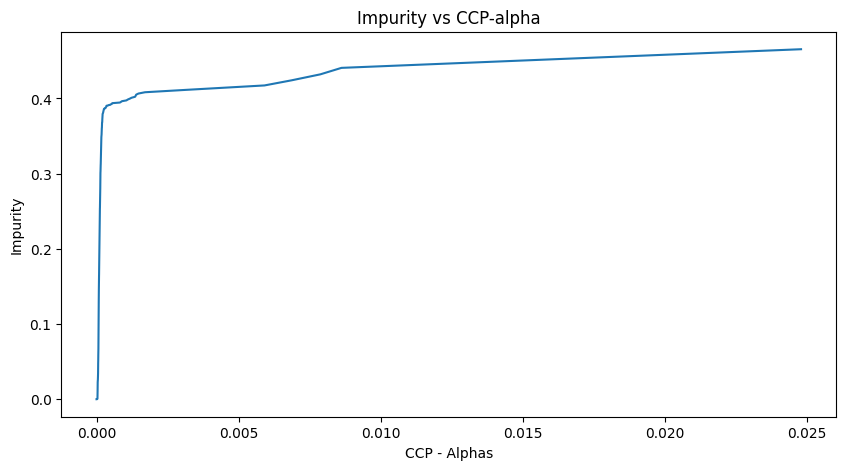

In [142]:
#pruning of the model
DT_prune = DecisionTreeClassifier(random_state=1,class_weight="balanced")
path = DT_prune.cost_complexity_pruning_path(X_train, y_train)

#figure to show impurites vs cce_alphas
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(path.ccp_alphas[:-1], path.impurities[:-1])
ax.set_xlabel("CCP - Alphas")
ax.set_ylabel("Impurity")
ax.set_title("Impurity vs CCP-alpha")
plt.show()

In [143]:
#hyperparater of ccp_alpha = 0.02, class_weight = "balanced" and random_state =1
DT4 = DecisionTreeClassifier(ccp_alpha = 0.02, class_weight = "balanced", random_state =1)
DT4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, class_weight='balanced', random_state=1)

In [144]:
#hyperparater of ccp_alpha = 0.0055, class_weight = "balanced" and random_state =1
DT5 = DecisionTreeClassifier(ccp_alpha = 0.0055, class_weight = "balanced", random_state =1)
DT5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0055, class_weight='balanced',
                       random_state=1)

In [145]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_DT(DT1,X_train,y_train).T,
        evaluation_training_data_DT(DT2,X_train,y_train).T,
        evaluation_training_data_DT(DT3,X_train,y_train).T,
        evaluation_training_data_DT(DT4,X_train,y_train).T,
        evaluation_training_data_DT(DT5,X_train,y_train).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree - class_weights =  'balanced' and random_state = 1",
    "Decision Tree - max_depth = 6 , max_leaf_nodes =40 , min_samples_split = 55",
    "Decision Tree - max_depth = 4 , max_leaf_nodes =80 , min_samples_split = 175",
    "Decision Tree - ccp-alpha = 0.02, class_weights = 'balanced, random_state = 1",
    "Decision Tree - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree - class_weights =  'balanced' and random_state = 1  \
Accuracy                                                 1.0                  
Recall                                                   1.0                  
Precision                                                1.0                  
F1                                                       1.0                  

           Decision Tree - max_depth = 6 , max_leaf_nodes =40 , min_samples_split = 55  \
Accuracy                                            0.732869                             
Recall                                              0.515408                             
Precision                                           0.616944                             
F1                                                  0.561624                             

           Decision Tree - max_depth = 4 , max_leaf_nodes =80 , min_samples_split = 175  \
Accuracy                                            0.712912                              
Recall                                              0.248561                              
Precision                                           0.686944                              
F1                                                  0.365038                              

           Decision Tree - ccp-alpha = 0.02, class_weights = 'balanced, random_state = 1  \
Accuracy                                            0.636798                               
Recall                                              0.705554                               
Precision                                           0.468782                               
F1                                                  0.563298                               

           Decision Tree - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1  
Accuracy                                            0.701332                                
Recall                                              0.632069                                
Precision                                           0.543140                                
F1                                                  0.584240

In [146]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_DT(DT1,X_test,y_test).T,
        evaluation_testing_data_DT(DT2,X_test,y_test).T,
        evaluation_testing_data_DT(DT3,X_test,y_test).T,
        evaluation_testing_data_DT(DT4,X_test,y_test).T,
        evaluation_testing_data_DT(DT5,X_test,y_test).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree - class_weights =  'balanced' and random_state = 1",
    "Decision Tree - max_depth = 6 , max_leaf_nodes =40 , min_samples_split = 55",
    "Decision Tree - max_depth = 4 , max_leaf_nodes =80 , min_samples_split = 175",
    "Decision Tree - ccp-alpha = 0.02, class_weights = 'balanced, random_state = 1",
    "Decision Tree - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1"
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Decision Tree - class_weights =  'balanced' and random_state = 1  \
Accuracy                                            0.644590                  
Recall                                              0.470774                  
Precision                                           0.465262                  
F1                                                  0.468002                  

           Decision Tree - max_depth = 6 , max_leaf_nodes =40 , min_samples_split = 55  \
Accuracy                                            0.733508                             
Recall                                              0.508689                             
Precision                                           0.620424                             
F1                                                  0.559028                             

           Decision Tree - max_depth = 4 , max_leaf_nodes =80 , min_samples_split = 175  \
Accuracy                                            0.716852                              
Recall                                              0.251185                              
Precision                                           0.707453                              
F1                                                  0.370737                              

           Decision Tree - ccp-alpha = 0.02, class_weights = 'balanced, random_state = 1  \
Accuracy                                            0.645377                               
Recall                                              0.712085                               
Precision                                           0.477237                               
F1                                                  0.571474                               

           Decision Tree - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1  
Accuracy                                            0.708852                                
Recall                                              0.640205                                
Precision                                           0.553242                                
F1                                                  0.593555

### Observations

1. The simple Decision tree is clearly overfitting since the accuracy and precision for training and testing data is different
2. The pre-pruned models have good accuracy but are failing on achieving the recall
3. The post-pruned model have good accuracy but not very good precision.
4. The best model is having hyperparameters max_depth = 4 , max_leaf_nodes =80 , min_samples_split = 175

### Random Forest - Hyperparameter tuning

In [ ]:
#function for evaluation matrix in training data
def evaluation_training_data_RF (model,X_train,y_train):

    #predicting the class
    pred = model.predict(X_train)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics

#function for evaluation in testing data
def evaluation_testing_data_RF (model,X_test,y_test):

    #predicting the class probability
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,y_pred), "Precision": precision_score(y_test,y_pred), "F1": f1_score(y_test,y_pred),},
        index=[0],
    )

    return evaluation_metrics

In [148]:
#hyperparameter max_depth = 4, max_features ='sqrt',n_estimators = 80
RF1 = RandomForestClassifier(max_depth=4, max_features='sqrt',n_estimators=80)
RF1.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=80)

In [149]:
#hyperparameter max_depth = 7, max_features = 'sqrt', n_estimators = 105
RF2 = RandomForestClassifier(max_depth=7,max_features='sqrt',n_estimators=105)
RF2.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=105)

In [150]:
#hyperparameter max_depth = 8, max_features = 'sqrt', min_samples_leaf = 20, n_estimators = 120
RF3= RandomForestClassifier(max_depth=8,max_features='sqrt',min_samples_leaf=20,n_estimators=120)
RF3.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=20, n_estimators=120)

In [151]:
#hyperparameter max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175
RF4= RandomForestClassifier(max_depth=10,max_features='log2',min_samples_leaf=20,n_estimators=175,min_samples_split=50)
RF4.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=20,
                       min_samples_split=50, n_estimators=175)

In [152]:
#hyperparameter max_depth = 12, max_features = 'log2', n_estimators = 200
RF5= RandomForestClassifier(max_depth=12,max_features='log2',n_estimators=200)
RF5.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=200)

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_RF(RF1,X_train,y_train).T,
        evaluation_training_data_RF(RF2,X_train,y_train).T,
        evaluation_training_data_RF(RF3,X_train,y_train).T,
        evaluation_training_data_RF(RF4,X_train,y_train).T,
        evaluation_training_data_RF(RF5,X_train,y_train).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "Random Forest- max_depth = 4, max_features ='sqrt',n_estimators = 80",
    "Random Forest - max_depth = 7, max_features = 'sqrt', n_estimators = 105",
    "Random Forest - max_depth = 8, max_features = 'sqrt', min_samples_leaf = 20, n_estimators = 120",
    "Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175",
    "Random Forest - max_depth = 12, max_features = 'log2', n_estimators = 200"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Random Forest- max_depth = 4, max_features ='sqrt',n_estimators = 80  \
Accuracy                                            0.712407                      
Recall                                              0.254487                      
Precision                                           0.678249                      
F1                                                  0.370106                      

           Random Forest - max_depth = 7, max_features = 'sqrt', n_estimators = 105  \
Accuracy                                            0.739614                          
Recall                                              0.405012                          
Precision                                           0.681481                          
F1                                                  0.508071                          

           Random Forest - max_depth = 8, max_features = 'sqrt', min_samples_leaf = 20, n_estimators = 120  \
Accuracy                                            0.740795                                                 
Recall                                              0.421097                                                 
Precision                                           0.675999                                                 
F1                                                  0.518936                                                 

           Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175  \
Accuracy                                            0.746248                                                                        
Recall                                              0.459025                                                                        
Precision                                           0.672705                                                                        
F1                                                  0.545692                                                                        

           Random Forest - max_depth = 12, max_features = 'log2', n_estimators = 200  
Accuracy                                            0.798921                          
Recall                                              0.554352                          
Precision                                           0.776013                          
F1                                                  0.646716

In [181]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_RF(RF1,X_test,y_test).T,
        evaluation_testing_data_RF(RF2,X_test,y_test).T,
        evaluation_testing_data_RF(RF3,X_test,y_test).T,
        evaluation_testing_data_RF(RF4,X_test,y_test).T,
        evaluation_testing_data_RF(RF5,X_test,y_test).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "Random Forest- max_depth = 4, max_features ='sqrt',n_estimators = 80",
    "Random Forest - max_depth = 7, max_features = 'sqrt', n_estimators = 105",
    "Random Forest - max_depth = 8, max_features = 'sqrt', min_samples_leaf = 20, n_estimators = 120",
    "Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175",
    "Random Forest - max_depth = 12, max_features = 'log2', n_estimators = 200"
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Random Forest- max_depth = 4, max_features ='sqrt',n_estimators = 80  \
Accuracy                                            0.716459                      
Recall                                              0.260269                      
Precision                                           0.695148                      
F1                                                  0.378736                      

           Random Forest - max_depth = 7, max_features = 'sqrt', n_estimators = 105  \
Accuracy                                            0.740328                          
Recall                                              0.405608                          
Precision                                           0.683755                          
F1                                                  0.509172                          

           Random Forest - max_depth = 8, max_features = 'sqrt', min_samples_leaf = 20, n_estimators = 120  \
Accuracy                                            0.740459                                                 
Recall                                              0.419431                                                 
Precision                                           0.676003                                                 
F1                                                  0.517670                                                 

           Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175  \
Accuracy                                            0.739672                                                                        
Recall                                              0.445893                                                                        
Precision                                           0.659848                                                                        
F1                                                  0.532171                                                                        

           Random Forest - max_depth = 12, max_features = 'log2', n_estimators = 200  
Accuracy                                            0.739410                          
Recall                                              0.453791                          
Precision                                           0.655448                          
F1                                                  0.536289

### Observations

1. Random Forest with hyperparameters max_depth = 4, max_features ='sqrt',n_estimators = 80, have very low recall on both training and testing data
2. Random Forest with max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175 have the best accuracy and good enough recall and precision in the list without any signs of overfitting, thus being the most best model for use.

## Boosting 

### Adaboost

In [155]:
from sklearn.ensemble import AdaBoostClassifier

AB0 = AdaBoostClassifier (random_state=1)
AB0.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [156]:
#evaluation metrics on train data
pred = (AB0.predict(X_train))

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.7275282477935803
Recall: 0.3928208601422282
Precision 0.64786372521642
F1-Score: 0.48909033414145675


<Axes: >

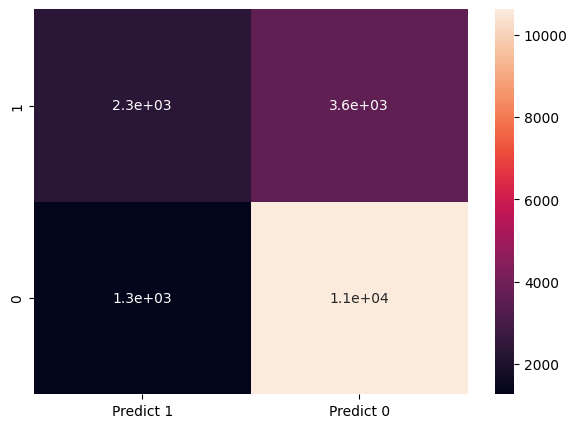

In [157]:
#building the confusion matrix for AdaForest training data
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [159]:
y_pred = AB0.predict(X_test)

In [160]:
#evaluation metrics on test data

accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.7308852459016394
Recall: 0.3949447077409163
Precision 0.6578947368421053
F1-Score: 0.49358341559723595


<Axes: >

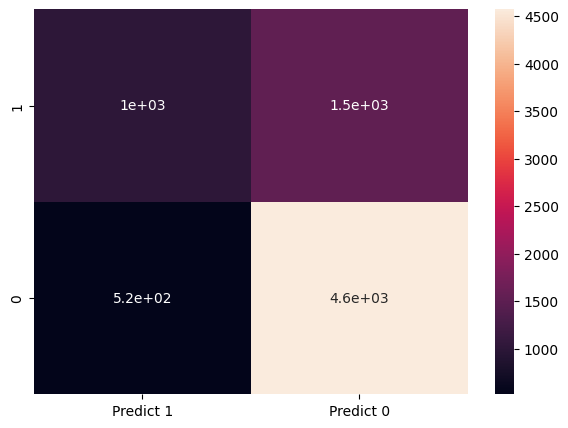

In [161]:
#building the confusion matrix for AdaForest training data
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

1. The accuracy and precision of training and testing are close to each other suggesting there is no overfitting
2. However, the recall is pretty small showing that the model is not that good.

### Gradient Boosting

In [162]:
from sklearn.ensemble import GradientBoostingClassifier

GB0 = GradientBoostingClassifier(random_state=1)
GB0.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [163]:
#evaluation metrics on train data
pred = (GB0.predict(X_train))

accuracy = accuracy_score(y_train,pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_train,pred))
print ("Precision",precision_score(y_train,pred))
print ("F1-Score:",f1_score(y_train,pred))

Accuracy: 0.7439991005677666
Recall: 0.4634270233660684
Precision 0.6639980591945658
F1-Score: 0.5458715596330275


<Axes: >

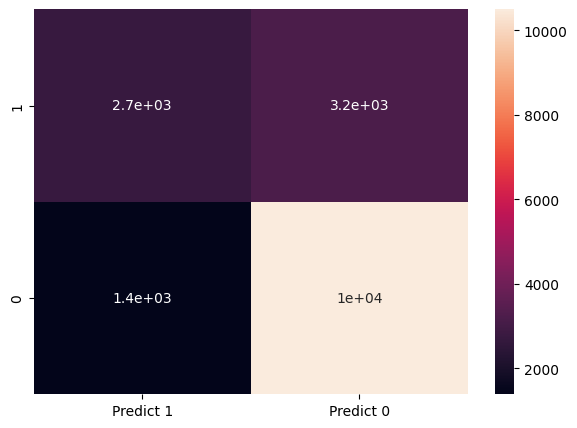

In [164]:
#building the confusion matrix for AdaForest training data
cm=confusion_matrix(y_train, pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [166]:
y_pred = GB0.predict(X_test)

In [167]:
#evaluation metrics on test data

accuracy = accuracy_score(y_test,y_pred)
print ("Accuracy:",accuracy)
print ("Recall:",recall_score(y_test,y_pred))
print ("Precision",precision_score(y_test,y_pred))
print ("F1-Score:",f1_score(y_test,y_pred))

Accuracy: 0.7378360655737705
Recall: 0.45221169036334913
Precision 0.651678998292544
F1-Score: 0.5339239916064351


<Axes: >

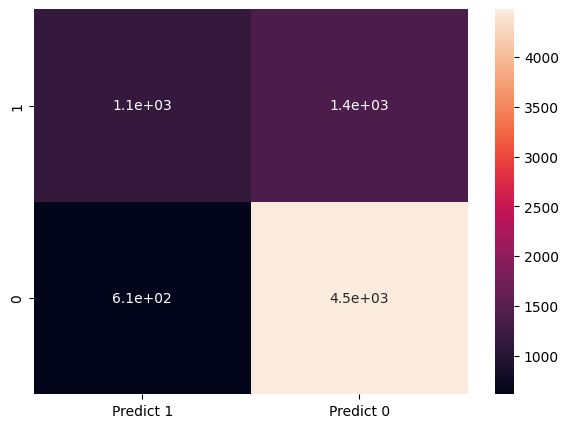

In [168]:
#building the confusion matrix for AdaForest training data
cm=confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Observations

1. There happens to be no overfitting as the accuracy and precision of the training and testing data is similar
2. However, recall is not very good and might possibly increase with hyperparameter tuning

## Model Improvement - Hyperparameter Tuning - Boosting

### Ada Boosting

In [174]:
#function for evaluation matrix in training data
def evaluation_training_data_AB (model,X_train,y_train):

    #predicting the class
    pred = model.predict(X_train)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics

#function for evaluation in testing data
def evaluation_testing_data_AB (model,X_test,y_test):

    #predicting the class probability
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,y_pred), "Precision": precision_score(y_test,y_pred), "F1": f1_score(y_test,y_pred),},
        index=[0],
    )

    return evaluation_metrics

In [175]:
#hyperparameter n_estimator = 50, learning_rate = 1, random_state =1
AB1= AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=1)
AB1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, random_state=1)

In [176]:
#hyperparameter n_estimator = 110, learning_rate = 0.5, random_state =1
AB2= AdaBoostClassifier(n_estimators=110,learning_rate=0.5,random_state=1)
AB2.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=110, random_state=1)

In [177]:
#hyperparameter n_estimator = 220, learning_rate = 0.15, random_state =1
AB3= AdaBoostClassifier(n_estimators=220,learning_rate=0.15,random_state=1)
AB3.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.15, n_estimators=220, random_state=1)

In [178]:
#hyperparameter n_estimator = 160, learning_rate = 0.1, random_state =1
AB4= AdaBoostClassifier(n_estimators=160,learning_rate=0.1,random_state=1)
AB4.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=160, random_state=1)

In [179]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_AB(AB1,X_train,y_train).T,
        evaluation_training_data_AB(AB2,X_train,y_train).T,
        evaluation_training_data_AB(AB3,X_train,y_train).T,
        evaluation_training_data_AB(AB4,X_train,y_train).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1",
    "Ada Boosting - n_estimator = 110, learning_rate = 0.5, random_state =1",
    "Ada Boosting - n_estimator = 220, learning_rate = 0.15, random_state =1",
    "Ada Boosting - n_estimator = 160, learning_rate = 0.1, random_state =1"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1  \
Accuracy                                            0.727528                     
Recall                                              0.392821                     
Precision                                           0.647864                     
F1                                                  0.489090                     

           Ada Boosting - n_estimator = 110, learning_rate = 0.5, random_state =1  \
Accuracy                                            0.725223                        
Recall                                              0.380291                        
Precision                                           0.646517                        
F1                                                  0.478891                        

           Ada Boosting - n_estimator = 220, learning_rate = 0.15, random_state =1  \
Accuracy                                            0.702513                         
Recall                                              0.216221                         
Precision                                           0.658247                         
F1                                                  0.325516                         

           Ada Boosting - n_estimator = 160, learning_rate = 0.1, random_state =1  
Accuracy                                            0.702513                       
Recall                                              0.216221                       
Precision                                           0.658247                       
F1                                                  0.325516

In [180]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_AB(AB1,X_test,y_test).T,
        evaluation_testing_data_AB(AB2,X_test,y_test).T,
        evaluation_testing_data_AB(AB3,X_test,y_test).T,
        evaluation_testing_data_AB(AB4,X_test,y_test).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1",
    "Ada Boosting - n_estimator = 110, learning_rate = 0.5, random_state =1",
    "Ada Boosting - n_estimator = 220, learning_rate = 0.15, random_state =1",
    "Ada Boosting - n_estimator = 160, learning_rate = 0.1, random_state =1"
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1  \
Accuracy                                            0.730885                     
Recall                                              0.394945                     
Precision                                           0.657895                     
F1                                                  0.493583                     

           Ada Boosting - n_estimator = 110, learning_rate = 0.5, random_state =1  \
Accuracy                                            0.728656                        
Recall                                              0.378357                        
Precision                                           0.659326                        
F1                                                  0.480803                        

           Ada Boosting - n_estimator = 220, learning_rate = 0.15, random_state =1  \
Accuracy                                            0.706885                         
Recall                                              0.219194                         
Precision                                           0.682657                         
F1                                                  0.331839                         

           Ada Boosting - n_estimator = 160, learning_rate = 0.1, random_state =1  
Accuracy                                            0.706885                       
Recall                                              0.219194                       
Precision                                           0.682657                       
F1                                                  0.331839

### Observations 

1. Ada Boosting with n_estimator = 50, learning_rate = 1, random_state =1 has performed the best in terms of not overfitting and having a high accurac, precision and recall in the list 
2. Others have pretty low recall

### Gradient Boosting

In [182]:
#function for evaluation matrix in training data
def evaluation_training_data_GB (model,X_train,y_train):

    #predicting the class
    pred = model.predict(X_train)

    accuracy = accuracy_score(y_train,pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_train,pred), "Precision": precision_score(y_train,pred), "F1": f1_score(y_train,pred),},
        index=[0],
    )

    return evaluation_metrics

#function for evaluation in testing data
def evaluation_testing_data_GB (model,X_test,y_test):

    #predicting the class probability
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)

    # creating a dataframe of metrics
    evaluation_metrics = pd.DataFrame(
        {"Accuracy": accuracy, "Recall": recall_score(y_test,y_pred), "Precision": precision_score(y_test,y_pred), "F1": f1_score(y_test,y_pred),},
        index=[0],
    )

    return evaluation_metrics

In [183]:
#hyperparameters are random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7
GB1 = GradientBoostingClassifier(random_state=1,n_estimators=55,subsample=0.7,max_features=0.75,max_depth=7)
GB1.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.75, n_estimators=55,
                           random_state=1, subsample=0.7)

In [184]:
#hyperparameters are random_state=1, n_estimators=100, subsample=0.85,max_features = 0.5, max_depth = 9
GB2 = GradientBoostingClassifier(random_state=1,n_estimators=100,subsample=0.85,max_features=0.8,max_depth=9)
GB2.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=9, max_features=0.8, random_state=1,
                           subsample=0.85)

In [185]:
#hyperparameters are random_state=1, n_estimators=160, subsample=0.8,max_features = 0.9, max_depth = 7
GB3 = GradientBoostingClassifier(random_state=1,n_estimators=160,subsample=0.8,max_features=0.9,max_depth=7)
GB3.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, max_features=0.9, n_estimators=160,
                           random_state=1, subsample=0.8)

In [187]:
#hyperparameters are random_state=1, n_estimators=200, subsample=0.85,max_features = 1, max_depth = 8
GB4 = GradientBoostingClassifier(random_state=1,n_estimators=200,subsample=0.85,max_features=1,max_depth=8)
GB4.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=8, max_features=1, n_estimators=200,
                           random_state=1, subsample=0.85)

In [188]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_GB(GB1,X_train,y_train).T,
        evaluation_training_data_GB(GB2,X_train,y_train).T,
        evaluation_training_data_GB(GB3,X_train,y_train).T,
        evaluation_training_data_GB(GB4,X_train,y_train).T
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boost with random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7",
    "Gradient Boost with random_state=1, n_estimators=100, subsample=0.85,max_features = 0.5, max_depth = 9",
    "Gradient Boost with random_state=1, n_estimators=160, subsample=0.8,max_features = 0.9, max_depth = 7",
    "Gradient Boost with random_state=1, n_estimators=200, subsample=0.85,max_features = 1, max_depth = 8",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient Boost with random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7  \
Accuracy                                            0.784417                                                       
Recall                                              0.534880                                                       
Precision                                           0.743819                                                       
F1                                                  0.622279                                                       

           Gradient Boost with random_state=1, n_estimators=100, subsample=0.85,max_features = 0.5, max_depth = 9  \
Accuracy                                            0.897633                                                        
Recall                                              0.755503                                                        
Precision                                           0.922091                                                        
F1                                                  0.830526                                                        

           Gradient Boost with random_state=1, n_estimators=160, subsample=0.8,max_features = 0.9, max_depth = 7  \
Accuracy                                            0.855023                                                       
Recall                                              0.670674                                                       
Precision                                           0.862024                                                       
F1                                                  0.754404                                                       

           Gradient Boost with random_state=1, n_estimators=200, subsample=0.85,max_features = 1, max_depth = 8  
Accuracy                                            0.835179                                                     
Recall                                              0.652218                                                     
Precision                                           0.814376                                                     
F1                                                  0.724332

In [189]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_testing_data_GB(GB1,X_test,y_test).T,
        evaluation_testing_data_GB(GB2,X_test,y_test).T,
        evaluation_testing_data_GB(GB3,X_test,y_test).T,
        evaluation_testing_data_GB(GB4,X_test,y_test).T
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
    "Gradient Boost with random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7",
    "Gradient Boost with random_state=1, n_estimators=100, subsample=0.85,max_features = 0.5, max_depth = 9",
    "Gradient Boost with random_state=1, n_estimators=160, subsample=0.8,max_features = 0.9, max_depth = 7",
    "Gradient Boost with random_state=1, n_estimators=200, subsample=0.85,max_features = 1, max_depth = 8",
]

print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


Gradient Boost with random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7  \
Accuracy                                            0.733902                                                       
Recall                                              0.460111                                                       
Precision                                           0.637657                                                       
F1                                                  0.534526                                                       

           Gradient Boost with random_state=1, n_estimators=100, subsample=0.85,max_features = 0.5, max_depth = 9  \
Accuracy                                            0.730098                                                        
Recall                                              0.456161                                                        
Precision                                           0.629085                                                        
F1                                                  0.528846                                                        

           Gradient Boost with random_state=1, n_estimators=160, subsample=0.8,max_features = 0.9, max_depth = 7  \
Accuracy                                            0.729705                                                       
Recall                                              0.458926                                                       
Precision                                           0.627091                                                       
F1                                                  0.529989                                                       

           Gradient Boost with random_state=1, n_estimators=200, subsample=0.85,max_features = 1, max_depth = 8  
Accuracy                                            0.726951                                                     
Recall                                              0.462875                                                     
Precision                                           0.618796                                                     
F1                                                  0.529598

### Observations

1. Gradient Boosting with hyperparameters  random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7 has the best accuracy and recall, without any overfitting. But precision suggests small overfitting
2. Rest of the models have shown significant amount of overfitting due to difference in recall

## Model Selection

In [191]:
# overall training performance comparison

models_train_comp_df = pd.concat(
    [
        evaluation_training_data_DT(DT5,X_train,y_train).T,
        evaluation_training_data_RF(RF4,X_train,y_train).T,
        evaluation_training_data_AB(AB1,X_train,y_train).T,
        evaluation_training_data_GB(GB1,X_train,y_train).T,
    ],
    
    axis=1,
)
models_train_comp_df.columns = [
   "Decision Tree  - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1",
   "Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175",
   "Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1",
   "Gradient Boosting - random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1  \
Accuracy                                            0.701332                                  
Recall                                              0.632069                                  
Precision                                           0.543140                                  
F1                                                  0.584240                                  

           Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175  \
Accuracy                                            0.746248                                                                        
Recall                                              0.459025                                                                        
Precision                                           0.672705                                                                        
F1                                                  0.545692                                                                        

           Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1  \
Accuracy                                            0.727528                     
Recall                                              0.392821                     
Precision                                           0.647864                     
F1                                                  0.489090                     

           Gradient Boosting - random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7  
Accuracy                                            0.784417                                                      
Recall                                              0.534880                                                      
Precision                                           0.743819                                                      
F1                                                  0.622279

In [196]:
# overall testing performance comparison

models_test_comp_df = pd.concat(
    [
        evaluation_training_data_DT(DT5,X_test,y_test).T,
        evaluation_training_data_RF(RF4,X_test,y_test).T,
        evaluation_training_data_AB(AB1,X_test,y_test).T,
        evaluation_training_data_GB(GB1,X_test,y_test).T,
    ],
    
    axis=1,
)
models_test_comp_df.columns = [
   "Decision Tree  - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1",
   "Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175",
   "Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1",
   "Gradient Boosting - random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  - ccp-alpha = 0.0055, class_weights = 'balanced, random_state = 1  \
Accuracy                                            0.708852                                  
Recall                                              0.640205                                  
Precision                                           0.553242                                  
F1                                                  0.593555                                  

           Random Forest - max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175  \
Accuracy                                            0.739672                                                                        
Recall                                              0.445893                                                                        
Precision                                           0.659848                                                                        
F1                                                  0.532171                                                                        

           Ada Boosting - n_estimator = 50, learning_rate = 1, random_state =1  \
Accuracy                                            0.730885                     
Recall                                              0.394945                     
Precision                                           0.657895                     
F1                                                  0.493583                     

           Gradient Boosting - random_state=1, n_estimators=55, subsample=0.7,max_features = 0.75, max_depth = 7  
Accuracy                                            0.733902                                                      
Recall                                              0.460111                                                      
Precision                                           0.637657                                                      
F1                                                  0.534526

### Observations

1. In current scenerio, precision has a important role as predicting for giving a visa to someone who should not have would question the country legal team. 
2. Therefore ,Random forest with hyperparameters as  max_depth = 10, max_features = 'log2', min_samples_leaf = 20, min_samples_split=50, n_estimators = 175, has been accuracy, recall and precision showing that it would be a good model to work with for classification.

## Business inghts and Recommendations

- Normalization of certain columns like prevailing_wage to per hour basis makes it all the more easier even for humans to easily understand the problem
- In this particular case, precision score has to be taken close care of since handing out visas to wrong applicants can lead to a lot of problem in terms of the security of the country.
- There should be certain constraints to be put on the data collection to reduce the outliers present in the data
- Using the Random Forest model, we can classify whether the applicant is eligible for a visa or not 
